In [ ]:
# ..... bulk coexpression conservation for candidate genes ..... #

In [2]:
library(corrplot)
library(viridis)
library(ggplot2)
library(ggridges)

In [3]:
# get heatmap across species x species table for a given gene #
my_palette = viridis::magma(10)

spe = c('human', 'chimp', 'rhesusm', 'crabm', 'mouse', 'rat', 'rabbit', 'boar', 'cow', 'dog', 'horse', 'goat',
         'sheep', 'chicken', 'zebrafish', 'atlanticsalmon', 'rainbowtrout',
         'fruitfly', 'roundworm', 'bee', 'bombyx', 'yeast', 'arabidopsis', 'maize', 'tomato')
spelist = c('human', 'chimp', 'rhesusm', 'crabm', 'mouse', 'rat', 'rabbit', 'boar',
        'sheep', 'goat', 'cow', 'horse', 'dog', 'chicken', 'zebrafish', 'atlanticsalmon', 'rainbowtrout',
        'roundworm', 'fruitfly', 'bee', 'bombyx', 'yeast', 'arabidopsis', 'maize', 'tomato')

bulkspec = read.delim('~/Primate_MTG/bulk_coexp_spec_cross_species_25.csv', sep = ',')
dim(bulkspec)

[1] 14131   301

Warning message in corrplot(scores[ids, ids], method = "color", is.corr = F, col = my_palette, :
“col.lim interval too wide, please set a suitable value”


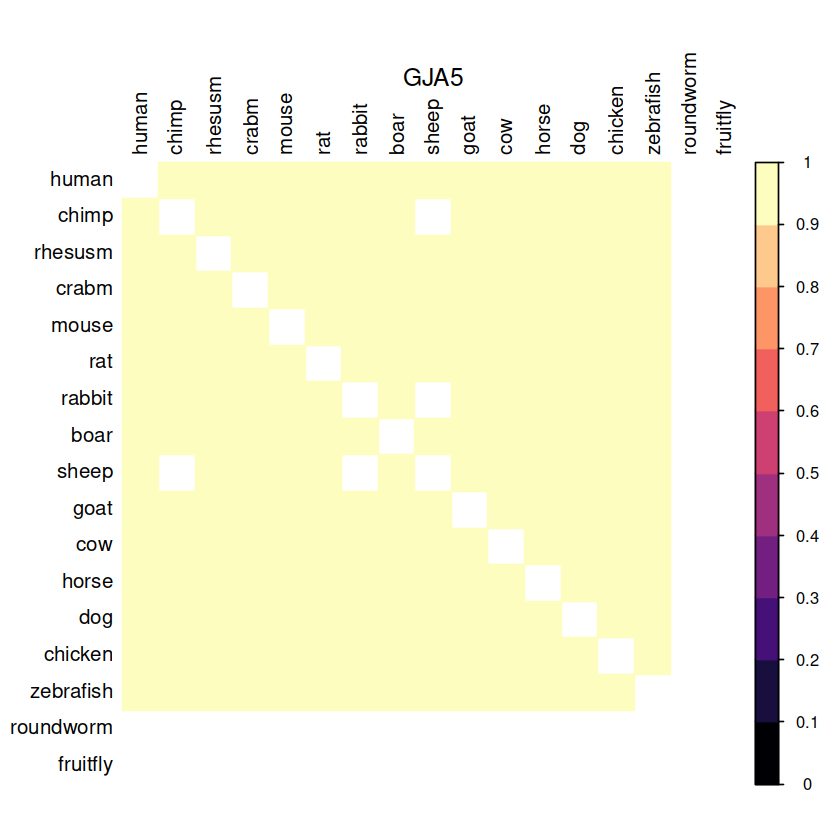

In [29]:
# show conservation over markers, differences over TFs maybe?
genename = 'GJA5'
scores = matrix(NA, nrow = length(spe), ncol = length(spe))
scores[lower.tri(scores, diag = F)] <- unlist(bulkspec[bulkspec$gene==genename,-1])
scores = t(scores)
scores[lower.tri(scores, diag = F)] <- unlist(bulkspec[bulkspec$gene==genename,-1])
rownames(scores) = spe
colnames(scores) = spe

ids = match(spelist[c(1:15,18,19)], spe)  # 1:19 for animals, 1:13 for mammals
# plot
# png(paste0('aa-', genename, '.png'), width = 8, height = 8, res = 300, units = 'in')
# pdf(paste0('aa-', genename, '.pdf'), width = 8, height = 8)
corrplot(scores[ids,ids], method = 'color', is.corr = F, col = my_palette, col.lim = c(0,1),
         tl.col = 'black', na.label = ' ', na.label.col = 'white')
mtext(genename, at = 9, line = 0.4, cex = 1.2)
# dev.off()

In [30]:
# get for chd genes
chd = read.delim('Jin_curated_CHD_genes.csv', sep = ',')
chd[1,]
dim(chd)

Gene  Gene.Set       Inheritance HHE.Rank pLI.Score
1 ABCC9 Human CHD Gene Monoallelic 90.3     0        
  X..of.Observed.Damaging.RGs.in.Cases observed.Cardiac.Phenotype observed.EM
1 0                                                                          
  observed.NDD
1

[1] 253   9

In [31]:
chd$Inheritance2 = chd$Inheritance
chd$Inheritance2[grep('X-linked', chd$Inheritance)] = 'X-linked'

In [38]:
df = data.frame(gene = bulkspec$gene, mean_spec = NA, disease = 'Non_CHD')
specol = c('human_mouse', 'human_chicken', 'human_zebrafish', 'mouse_chicken', 'mouse_zebrafish',
          'chicken_zebrafish')

for(ii in 1:dim(bulkspec)[1]){
    genename = bulkspec$gene[ii]
    scores = matrix(NA, nrow = length(spe), ncol = length(spe))
    scores[lower.tri(scores, diag = F)] <- unlist(bulkspec[bulkspec$gene==genename,-1])
    rownames(scores) = spe
    colnames(scores) = spe

    ids = match(spelist[c(1:15,18,19)], spe)  # 1:19 for animals, 1:13 for mammals
    scores <- scores[ids,ids]
    df$mean_spec[ii] = mean(unlist(scores[lower.tri(scores, diag = F)]), na.rm = T)
}

temp = data.frame(bulkspec[,match(specol, colnames(bulkspec))])
colnames(temp) = specol
df <- cbind(df, temp)

In [39]:
ids = match(chd$Gene, df$gene)
ids = ids[!is.na(ids)]
df$disease[ids] = 'CHD'
df$inheritance = NA
df$inheritance[ids] = chd$Inheritance2[match(df$gene[ids], chd$Gene)]
df[1,]

gene mean_spec disease human_mouse human_chicken human_zebrafish
1 A1BG 0.8021342 Non_CHD 0.3459922   0.7454553     NA             
  mouse_chicken mouse_zebrafish chicken_zebrafish inheritance
1 0.9196793     NA              NA                NA

Warning message:
“Removed 111 rows containing non-finite values (`stat_boxplot()`).”


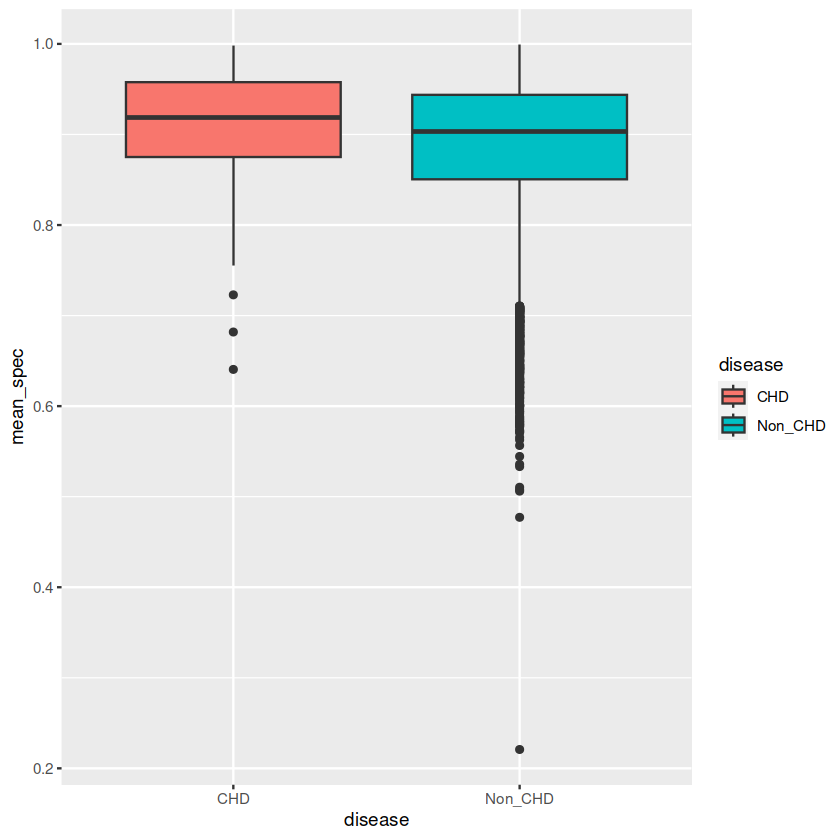

In [40]:
df$disease = as.factor(df$disease)
df$inheritance = as.factor(df$inheritance)
ggplot(df, aes(x = disease, y = mean_spec, fill = disease)) + geom_boxplot()

In [58]:
table(df$disease)


    CHD Non_CHD 
    213   13918 

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Picking joint bandwidth of 0.0201

Warning message:
“Removed 1 rows containing non-finite values (`stat_density_ridges()`).”


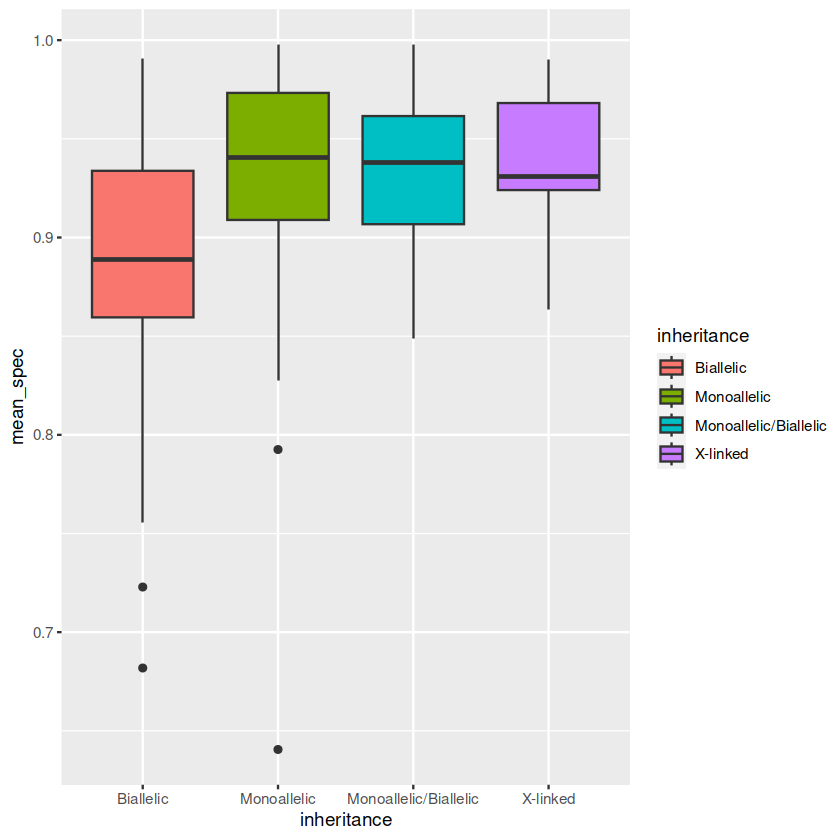

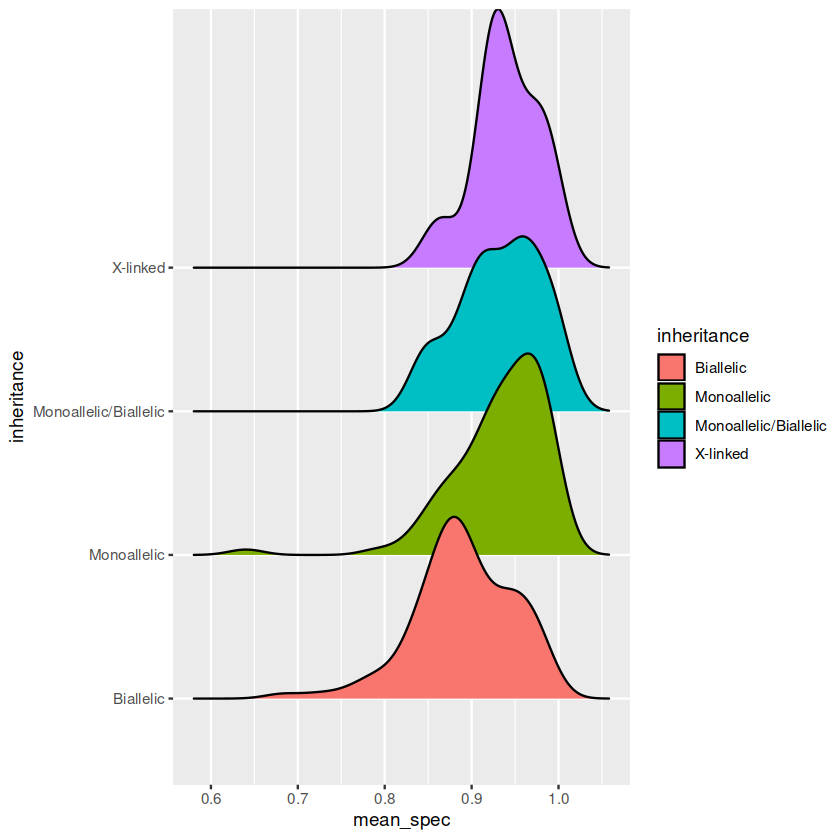

In [41]:
df2 = df
df2 <- df2[!is.na(df2$inheritance),]
ggplot(df2, aes(x = inheritance, y = mean_spec, fill = inheritance)) + geom_boxplot()
ggplot(df2, aes(y = inheritance, x = mean_spec, fill = inheritance)) + geom_density_ridges()

In [53]:
df3 = data.frame(mean_spec = as.vector(unlist(df[,4:9])), spepair = rep(specol, each = dim(df)[1]),
                 inheritance = rep(df$inheritance, length(specol)), disease = rep(df$disease, length(specol)))
df3$spepair = factor(df3$spepair, levels = c('human_mouse', 'human_chicken', 'mouse_chicken', 
                                             'human_zebrafish', 'mouse_zebrafish', 'chicken_zebrafish'))
df3[1,]

mean_spec spepair     inheritance disease
1 0.3459922 human_mouse NA          Non_CHD

Warning message:
“Removed 9781 rows containing non-finite values (`stat_boxplot()`).”


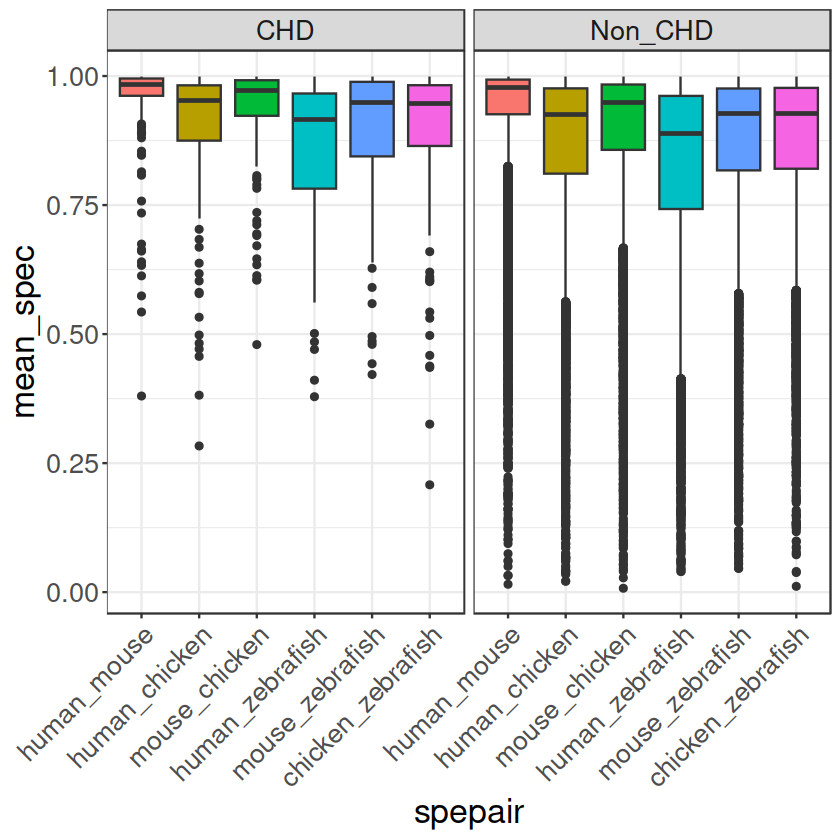

In [60]:
# png('aa-chd-non-spes-dist.png', width = 10, height = 8, res = 300, units = 'in')
ggplot(df3, aes(x = spepair, y = mean_spec, fill = spepair)) + geom_boxplot() +
facet_wrap(vars(disease), ncol = 2) + theme_bw() +
theme(text = element_text(size=20), axis.text.x = element_text(angle=45, hjust=1)) +
theme(legend.position = 'none')
# dev.off()

In [38]:
# save
write.table(df, file = 'Jin_CHD_bulk_coexp_spec.csv', sep = ',', row.names = F, col.names = T, quote = F)